# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

Estes dados estão no arquivo ```previsao_de_renda.csv```.

Variável target: ```renda```.

## Etapa 2 Crisp-DM: Entendimento dos dados


O dicionário abaixo é autoexplicativo e facilita a compreensão de todas as variáveis da base.


### Dicionário de dados


| Variável                | Descrição                                             | Tipo         |
| ----------------------- |-------------------------------------------------------| -------------|
| Unnamed: 0              |  Variável sem identificação da origem                 | int64        |
| data_ref                |  Data de referência de coleta das variáveis           | object       |
| id_cliente              |  Código de identificação do cliente                   | int64        |
| sexo                    |  Sexo do cliente                                      | object       |
| posse_de_veiculo        |  Indica se o cliente possui veículo                   | bool         |
| posse_de_imovel         |  Indica se o cliente possui imóvel                    | bool         |
| qtd_filhos              |  Quantidade de filhos do cliente                      | int64        |
| tipo_renda              |  Tipo de renda do cliente                             | object       |
| educacao                |  Grau de instrução do cliente                         | object       |
| estado_civil            |  Estado civil do cliente                              | object       |
| tipo_residencia         |  Tipo de residência do cliente (própria, alugada etc) | object       |
| idade                   |  Idade do cliente                                     | int64        |
| tempo_emprego           |  Tempo no emprego atual                               | float64      |
| qt_pessoas_residencia   |  Quantidade de pessoas que moram na residência        | float64      |
| renda                   |  Renda em reais                                       | float64      |

#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira ação do programa.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree

%matplotlib inline

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [2]:
df_renda = pd.read_csv('./input/previsao_de_renda.csv')
df_renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [3]:
df_renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

### Análise completa gerada pelo Pandas Profiling utilizando o ProfileReport

Para verificar essa análise, pode rodar esse arquivo no Jupyter Notebook em seu navegador ou verificar a versão HTML.

In [4]:
relatorio_perfil = ProfileReport(df_renda, explorative=True, minimal=True, html={'style': {'full_width': True}})
relatorio_perfil

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Exportando análise em uma versão html

In [5]:
relatorio_perfil.to_file('./output/renda_analise.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Bivariadas




### Analisando as variáveis ```qualitativas``` ao longo do tempo

O objetivo é entender se teve alguma variação a ser considerada na análise.

In [6]:
# alterando data_ref (object) para datetime 
df_renda['data_ref'] = pd.to_datetime(df_renda['data_ref'])

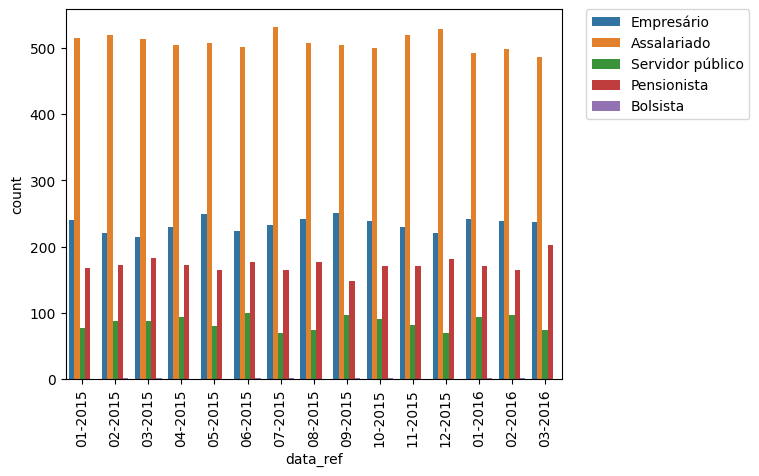

In [8]:
# tipo de renda
ax = sns.countplot(
    data=df_renda,
    x='data_ref',
    hue='tipo_renda'
)

tick_labs = df_renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df_renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

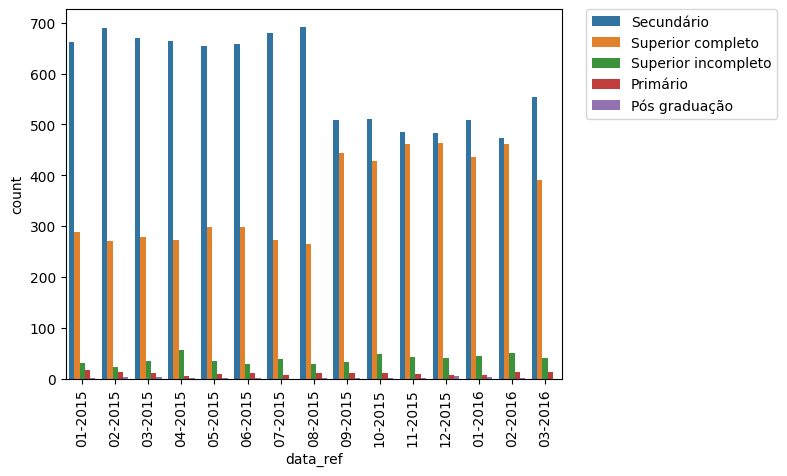

In [9]:
# educação
ax = sns.countplot(
    data=df_renda,
    x='data_ref',
    hue='educacao'
)

tick_labs = df_renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df_renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

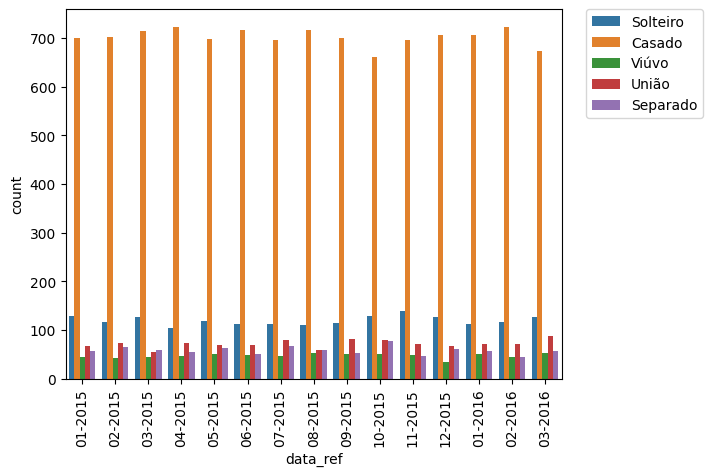

In [10]:
# estado civil
ax = sns.countplot(
    data=df_renda,
    x='data_ref',
    hue='estado_civil'
)

tick_labs = df_renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df_renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

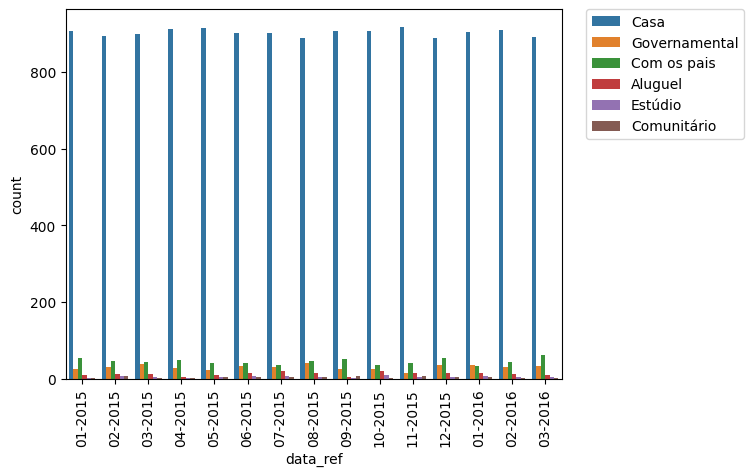

In [11]:
# tipo_residencia
ax = sns.countplot(
    data=df_renda,
    x='data_ref',
    hue='tipo_residencia'
)

tick_labs = df_renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df_renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

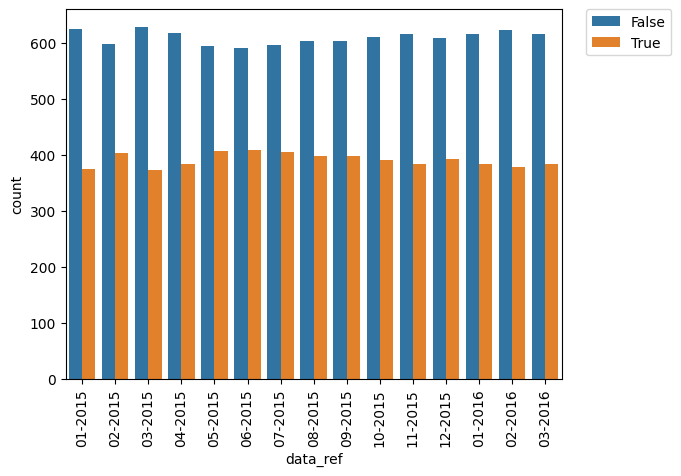

In [12]:
# posse de veiculo
ax = sns.countplot(
    data=df_renda,
    x='data_ref',
    hue='posse_de_veiculo'
)

tick_labs = df_renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df_renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

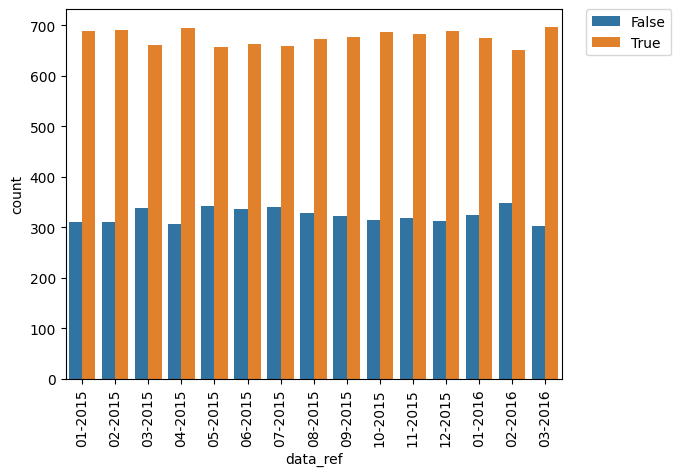

In [13]:
# posse_de_imovel
ax = sns.countplot(
    data=df_renda,
    x='data_ref',
    hue='posse_de_imovel'
)

tick_labs = df_renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df_renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Avaliação da Estabilidade das variáveis

C:\Users\Joao Narciso Santos\AppData\Local\Temp\ipykernel_22288\1886139853.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(


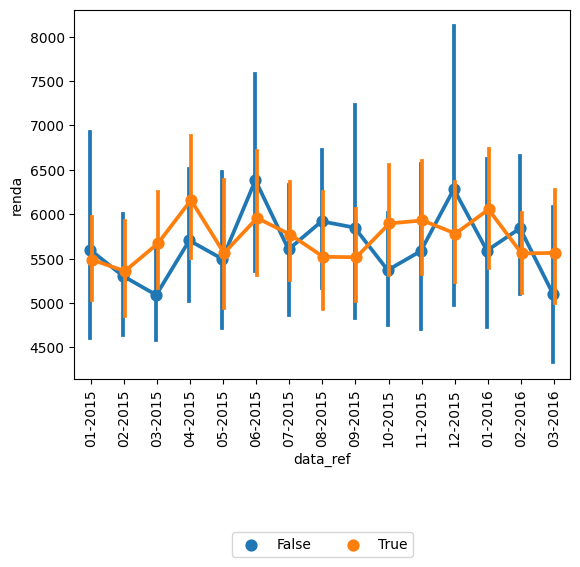

In [14]:
# y=renda, x=data_ref, hue=posse_de_imovel
ax = sns.pointplot(
    data=df_renda,
    x='data_ref',
    y='renda',
    hue='posse_de_imovel',
    dodge=True,
    ci=95
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.30), ncol=3)

tick_labs = df_renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df_renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.50), ncol=3)

C:\Users\Joao Narciso Santos\AppData\Local\Temp\ipykernel_22288\2742363026.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(


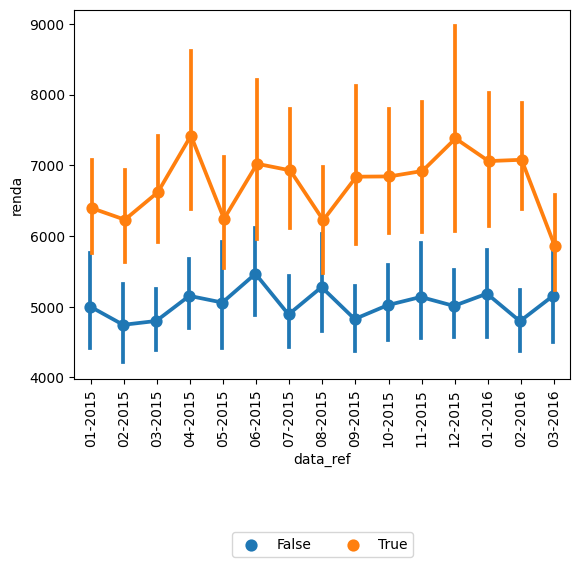

In [15]:
# y=renda, x=data_ref, hue=posse_de_veiculo
ax = sns.pointplot(
    data=df_renda,
    x='data_ref',
    y='renda',
    hue='posse_de_veiculo',
    dodge=True,
    ci=95
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.30), ncol=3)

tick_labs = df_renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df_renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.50), ncol=3)

C:\Users\Joao Narciso Santos\AppData\Local\Temp\ipykernel_22288\1086360818.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(


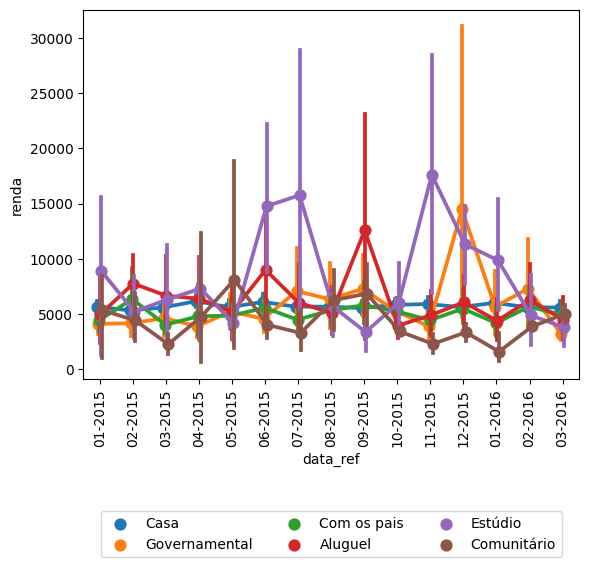

In [16]:
# y=renda, x=data_ref, hue=tipo_residencia
ax = sns.pointplot(
    data=df_renda,
    x='data_ref',
    y='renda',
    hue='tipo_residencia',
    dodge=True,
    ci=95
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.30), ncol=3)

tick_labs = df_renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df_renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.50), ncol=3)

C:\Users\Joao Narciso Santos\AppData\Local\Temp\ipykernel_22288\80184495.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(


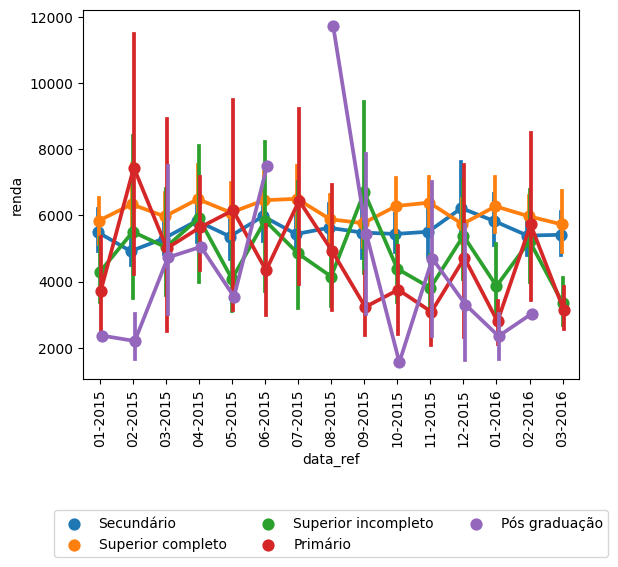

In [17]:
# y=renda, x=data_ref, hue=educacao
ax = sns.pointplot(
    data=df_renda,
    x='data_ref',
    y='renda',
    hue='educacao',
    dodge=True,
    ci=95
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.30), ncol=3)

tick_labs = df_renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df_renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.50), ncol=3)

C:\Users\Joao Narciso Santos\AppData\Local\Temp\ipykernel_22288\1904136300.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(


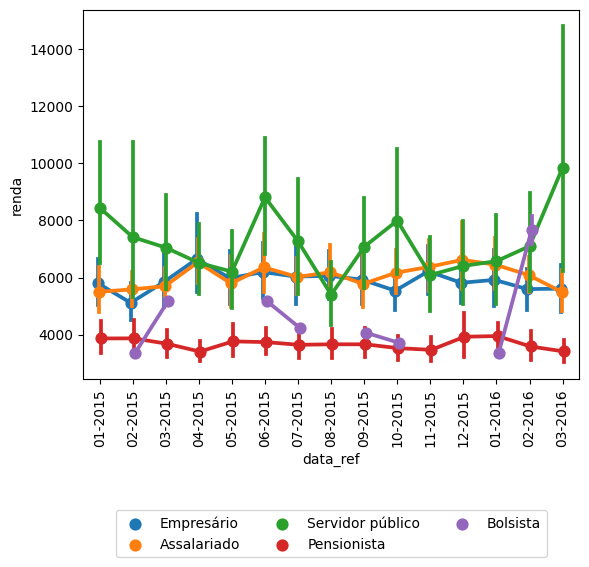

In [18]:
# y=renda, x=data_ref, hue=tipo_renda
ax = sns.pointplot(
    data=df_renda,
    x='data_ref',
    y='renda',
    hue='tipo_renda',
    dodge=True,
    ci=95
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.30), ncol=3)

tick_labs = df_renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df_renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.50), ncol=3)

C:\Users\Joao Narciso Santos\AppData\Local\Temp\ipykernel_22288\236920101.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(


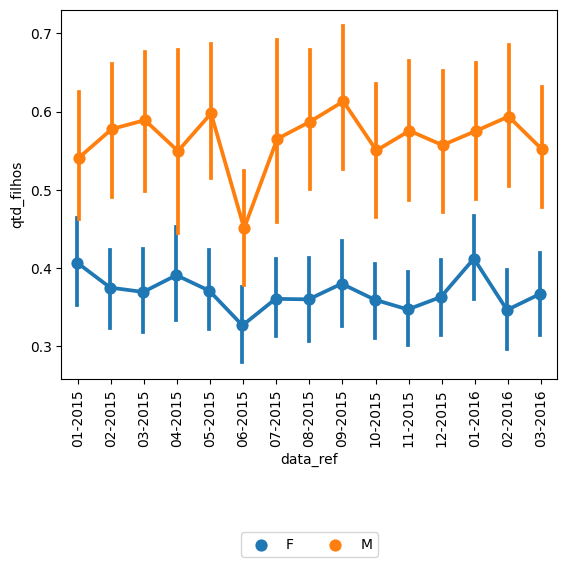

In [19]:
# y=qtd_filhos, x=data_ref, hue=sexo
ax = sns.pointplot(
    data=df_renda,
    x='data_ref',
    y='qtd_filhos',
    hue='sexo',
    dodge=True,
    ci=95
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.30), ncol=3)

tick_labs = df_renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df_renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.50), ncol=3)

C:\Users\Joao Narciso Santos\AppData\Local\Temp\ipykernel_22288\2896558670.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(


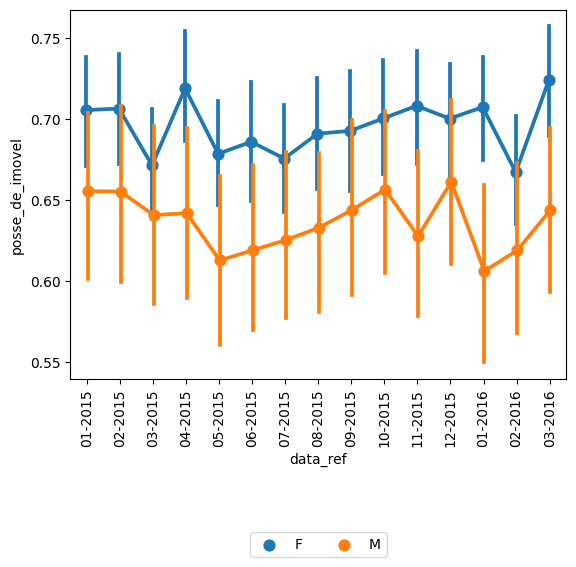

In [20]:
# y=posse_de_imovel, x=data_ref, hue=sexo
ax = sns.pointplot(
    data=df_renda,
    x='data_ref',
    y='posse_de_imovel',
    hue='sexo',
    dodge=True,
    ci=95
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.30), ncol=3)

tick_labs = df_renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df_renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.50), ncol=3)

C:\Users\Joao Narciso Santos\AppData\Local\Temp\ipykernel_22288\3850854519.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(


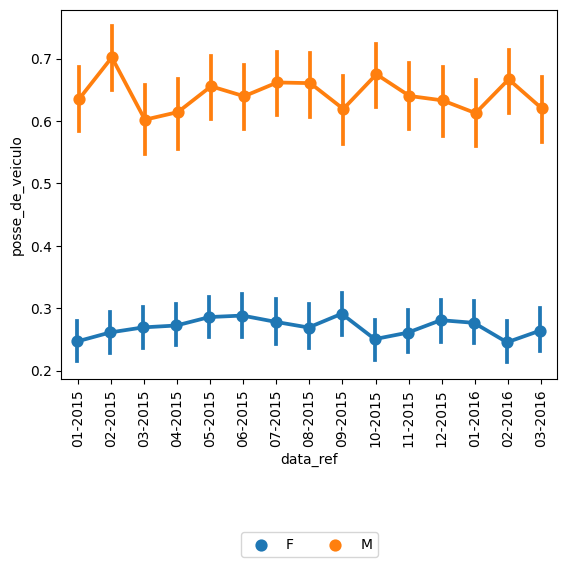

In [21]:
# y=posse_de_veiculo, x=data_ref, hue=sexo
ax = sns.pointplot(
    data=df_renda,
    x='data_ref',
    y='posse_de_veiculo',
    hue='sexo',
    dodge=True,
    ci=95
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.30), ncol=3)

tick_labs = df_renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df_renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.50), ncol=3)

C:\Users\Joao Narciso Santos\AppData\Local\Temp\ipykernel_22288\348381247.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(


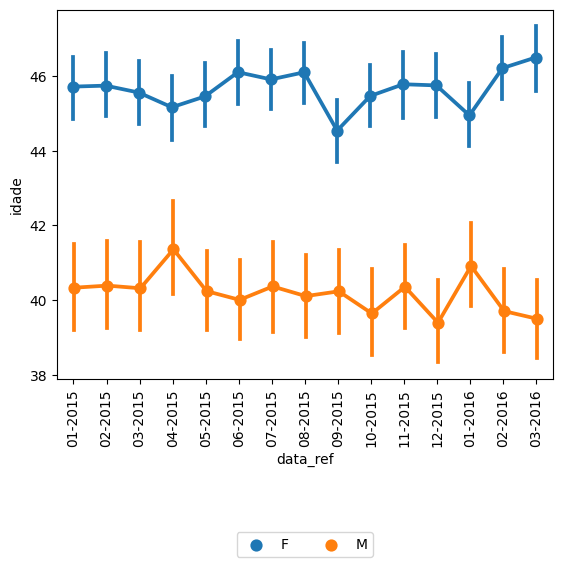

In [22]:
# y=idade, x=data_ref, hue=sexo
ax = sns.pointplot(
    data=df_renda,
    x='data_ref',
    y='idade',
    hue='sexo',
    dodge=True,
    ci=95
)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = df_renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df_renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

<AxesSubplot:xlabel='posse_de_veiculo', ylabel='renda'>

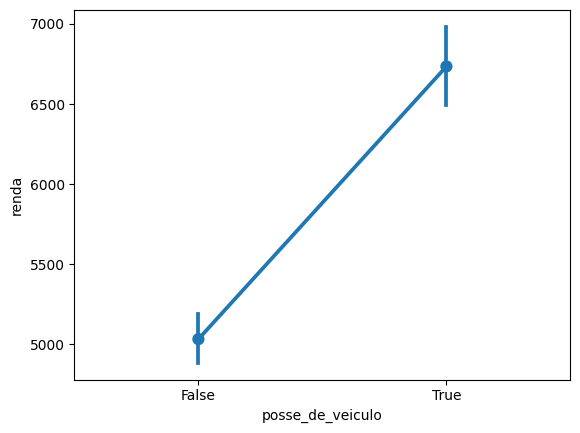

In [23]:
sns.pointplot(y='renda', x='posse_de_veiculo', data=df_renda)

<AxesSubplot:xlabel='posse_de_imovel', ylabel='renda'>

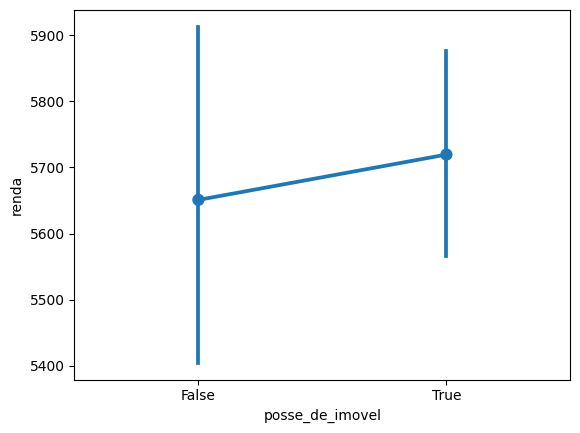

In [24]:
sns.pointplot(y='renda', x='posse_de_imovel', data=df_renda)

In [25]:
df_renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             15000 non-null  int64         
 1   data_ref               15000 non-null  datetime64[ns]
 2   id_cliente             15000 non-null  int64         
 3   sexo                   15000 non-null  object        
 4   posse_de_veiculo       15000 non-null  bool          
 5   posse_de_imovel        15000 non-null  bool          
 6   qtd_filhos             15000 non-null  int64         
 7   tipo_renda             15000 non-null  object        
 8   educacao               15000 non-null  object        
 9   estado_civil           15000 non-null  object        
 10  tipo_residencia        15000 non-null  object        
 11  idade                  15000 non-null  int64         
 12  tempo_emprego          12427 non-null  float64       
 13  q

### Insight

- A variável ```Educação``` teve variação com o tempo. Teve diminuição na variável ```secundário``` e aumento na ```superior completo```.
- As demais variáveis não mostram alterações consideráveis.
- As variáveis mostram estabilidade ao longo do tempo.
- Duas variáveis chamam atenção para explicar a variável ```renda```, ```posse_de_veiculo``` e ```posse_de_imovel```. Estas variáveis mostram, quanto maior a renda, maior a quantidade de pessoas com posse de veículo e posse de imóvel.

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



### Seleção

Retirando variáveis que não serão utilizadas, deixando as apropriadas para análise.

In [26]:
df_renda = df_renda.drop(['Unnamed: 0', 'data_ref', 'id_cliente'], axis=1)
df_renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   15000 non-null  object 
 1   posse_de_veiculo       15000 non-null  bool   
 2   posse_de_imovel        15000 non-null  bool   
 3   qtd_filhos             15000 non-null  int64  
 4   tipo_renda             15000 non-null  object 
 5   educacao               15000 non-null  object 
 6   estado_civil           15000 non-null  object 
 7   tipo_residencia        15000 non-null  object 
 8   idade                  15000 non-null  int64  
 9   tempo_emprego          12427 non-null  float64
 10  qt_pessoas_residencia  15000 non-null  float64
 11  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(5)
memory usage: 1.2+ MB


### Limpeza

Verificar todos os dados faltantes e agir para não comprometer as análises.

In [27]:
df_renda.isnull().sum()

sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

Retirando todas as linhas com NaN da variável ```tempo_emprego```.

In [28]:
df_renda.dropna(inplace=True)
df_renda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12427 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   12427 non-null  object 
 1   posse_de_veiculo       12427 non-null  bool   
 2   posse_de_imovel        12427 non-null  bool   
 3   qtd_filhos             12427 non-null  int64  
 4   tipo_renda             12427 non-null  object 
 5   educacao               12427 non-null  object 
 6   estado_civil           12427 non-null  object 
 7   tipo_residencia        12427 non-null  object 
 8   idade                  12427 non-null  int64  
 9   tempo_emprego          12427 non-null  float64
 10  qt_pessoas_residencia  12427 non-null  float64
 11  renda                  12427 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(5)
memory usage: 1.1+ MB


### Tratando dados duplicados

Verificação de toda a base, caso tenha dados duplicados, serão retirados e ajustado o index.

In [29]:
df_renda = df_renda.drop_duplicates()
df_renda = df_renda.reset_index(drop=True)
print(df_renda.shape)
print("")
print(df_renda.info())

(8655, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8655 entries, 0 to 8654
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   8655 non-null   object 
 1   posse_de_veiculo       8655 non-null   bool   
 2   posse_de_imovel        8655 non-null   bool   
 3   qtd_filhos             8655 non-null   int64  
 4   tipo_renda             8655 non-null   object 
 5   educacao               8655 non-null   object 
 6   estado_civil           8655 non-null   object 
 7   tipo_residencia        8655 non-null   object 
 8   idade                  8655 non-null   int64  
 9   tempo_emprego          8655 non-null   float64
 10  qt_pessoas_residencia  8655 non-null   float64
 11  renda                  8655 non-null   float64
dtypes: bool(2), float64(3), int64(2), object(5)
memory usage: 693.2+ KB
None


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


### Técnica de modelagem será a "árvore de regressão" utilizando a bilbioteca ```scikit-learn```

Essa biblioteca não roda variáveis qualitativas (object) e não aceita dados faltantes.

Necessário ajustar o dataframe alterando os tipos de dados de algumas variáveis.<br>
Após a mudança dos tipos de dados, eles são alterados para ```boolean```, deta forma, são criadas mais variáveis ````qualitativas````.

In [30]:
df_renda = pd.get_dummies(df_renda, columns=['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True).copy()
df_renda.dtypes

posse_de_veiculo                    bool
posse_de_imovel                     bool
qtd_filhos                         int64
idade                              int64
tempo_emprego                    float64
qt_pessoas_residencia            float64
renda                            float64
sexo_M                             uint8
tipo_renda_Bolsista                uint8
tipo_renda_Empresário              uint8
tipo_renda_Pensionista             uint8
tipo_renda_Servidor público        uint8
educacao_Pós graduação             uint8
educacao_Secundário                uint8
educacao_Superior completo         uint8
educacao_Superior incompleto       uint8
estado_civil_Separado              uint8
estado_civil_Solteiro              uint8
estado_civil_União                 uint8
estado_civil_Viúvo                 uint8
tipo_residencia_Casa               uint8
tipo_residencia_Com os pais        uint8
tipo_residencia_Comunitário        uint8
tipo_residencia_Estúdio            uint8
tipo_residencia_

### Separação das variáveis

As variáveis são separadas em ```explicativas``` em ```X``` e da variável target ```renda``` em ```y```.<br>
Após separados em X e y, é necessário separar em ```treino``` e ```teste```.<br>
O dataframe é separado em proporção diferente para treino e teste, para essa regressão, será ```25% para teste```.  

In [31]:
X = df_renda.drop(['renda'], axis=1).copy()
y = df_renda['renda']

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8655 entries, 0 to 8654
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               8655 non-null   bool   
 1   posse_de_imovel                8655 non-null   bool   
 2   qtd_filhos                     8655 non-null   int64  
 3   idade                          8655 non-null   int64  
 4   tempo_emprego                  8655 non-null   float64
 5   qt_pessoas_residencia          8655 non-null   float64
 6   sexo_M                         8655 non-null   uint8  
 7   tipo_renda_Bolsista            8655 non-null   uint8  
 8   tipo_renda_Empresário          8655 non-null   uint8  
 9   tipo_renda_Pensionista         8655 non-null   uint8  
 10  tipo_renda_Servidor público    8655 non-null   uint8  
 11  educacao_Pós graduação         8655 non-null   uint8  
 12  educacao_Secundário            8655 non-null   u

In [33]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 8655 entries, 0 to 8654
Series name: renda
Non-Null Count  Dtype  
--------------  -----  
8655 non-null   float64
dtypes: float64(1)
memory usage: 67.7 KB


### Rodando o modelo


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2360873)

In [35]:
# Treinando duas árvores de regressão com profundidades diferentes
reg_1 = DecisionTreeRegressor(max_depth=2)
reg_2 = DecisionTreeRegressor(max_depth=8)

reg_1.fit(X_test, y_test)
reg_2.fit(X_test, y_test)

DecisionTreeRegressor(max_depth=8)

In [36]:
mse1 = reg_1.score(X_test, y_test)
mse2 = reg_2.score(X_test, y_test)

template = "O R-quadrado da árvore com profundidade {0} é: {1:.2f}"

print(template.format(reg_1.get_depth(), mse1).replace(".", ","))
print(template.format(reg_2.get_depth(), mse2).replace(".", ","))

O R-quadrado da árvore com profundidade 2 é: 0,32
O R-quadrado da árvore com profundidade 8 é: 0,80


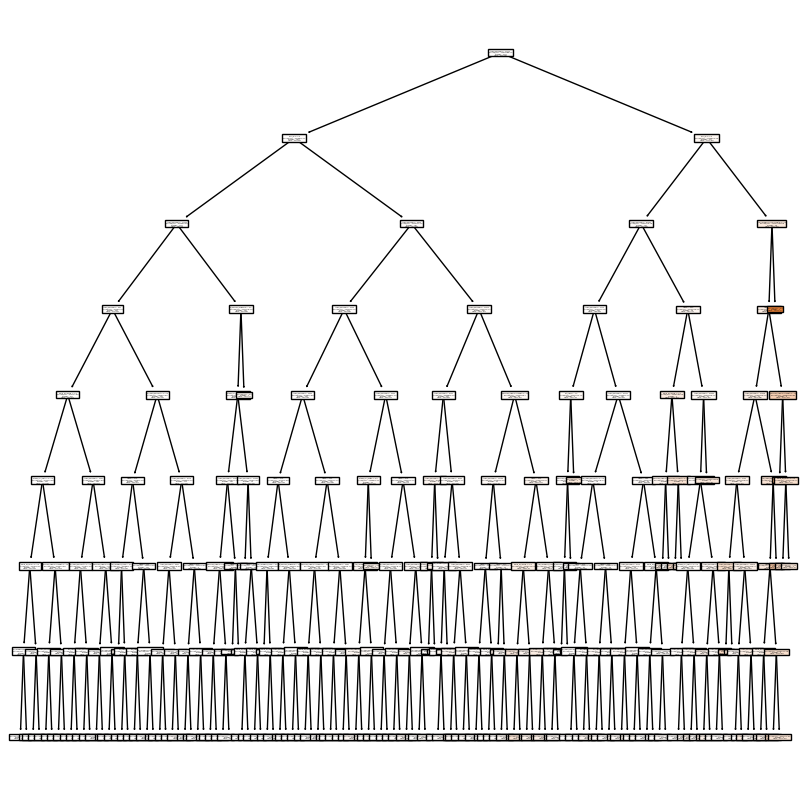

In [37]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(reg_2,
                    feature_names=X_test.columns,
                    filled=True)

In [38]:
# Pré poda da melhor árvore

reg_2 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=20)
reg_2.fit(X_train, y_train)
mse1 = reg_2.score(X_test, y_test)
mse1

0.4092098022469526

n_minimo,2,3,4,5,6,7,8,9
profundidade,,,,,,,,
2,0.297251,0.297251,0.297251,0.297251,0.297251,0.297251,0.297251,0.297251
3,0.322755,0.424518,0.424518,0.424518,0.424518,0.415496,0.415496,0.415496
4,0.393912,0.458486,0.458486,0.458486,0.458486,0.441825,0.441825,0.429835
5,0.390022,0.469950,0.469950,0.470516,0.476072,0.444754,0.445439,0.435675
6,0.393448,0.444757,0.444040,0.455260,0.463359,0.432603,0.432327,0.421859
7,0.323145,0.383695,0.397633,0.429079,0.436730,0.412011,0.411869,0.402224
8,0.371306,0.382367,0.395994,0.430133,0.436860,0.412748,0.406183,0.394079


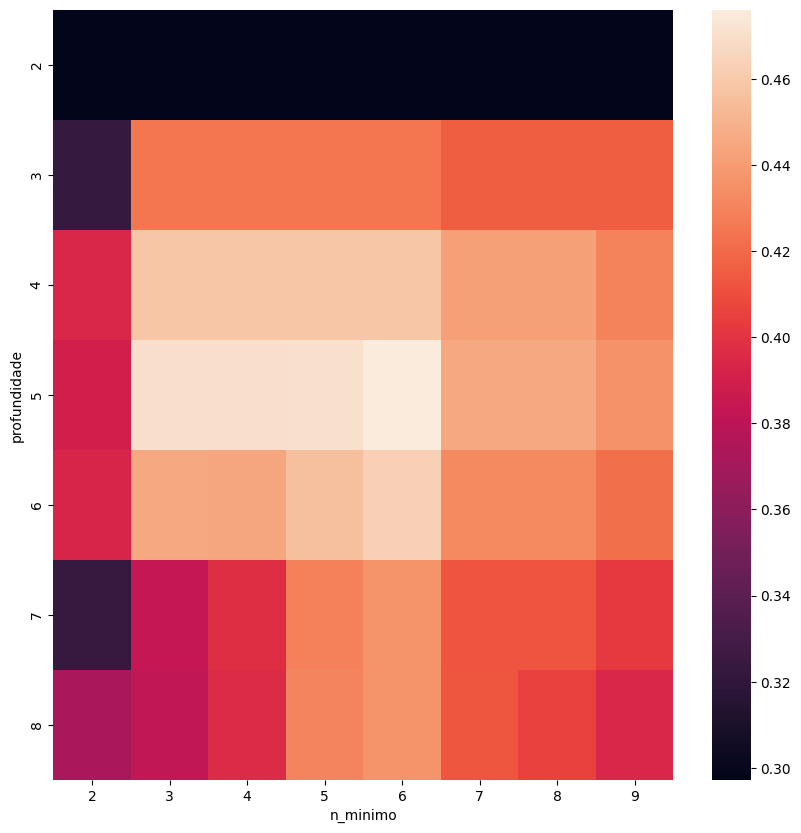

In [39]:
mses = []
ind_i = []
ind_j = []

for i in range(2, 9):
    for j in range(2, 10):
        reg_2 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        reg_2.fit(X_train, y_train)
        mse1 = reg_2.score(X_test, y_test)
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)

df_mse = pd.DataFrame({'mses': mses, 'profundidade': ind_i, 'n_minimo': ind_j})
sns.heatmap(df_mse.pivot(index='profundidade',
            columns='n_minimo', values='mses'))
df_mse.pivot(index='profundidade', columns='n_minimo', values='mses')

In [40]:
path = reg_2.cost_complexity_pruning_path(X_test, y_test)
path

{'ccp_alphas': array([0.00000000e+00, 2.02584341e+03, 2.89399703e+03, 4.18786239e+03,
        4.47427771e+03, 5.55317002e+03, 5.55826239e+03, 7.12962768e+03,
        7.29080886e+03, 7.29135799e+03, 7.86527420e+03, 7.88967089e+03,
        7.94831150e+03, 8.36997064e+03, 8.40829850e+03, 1.04228610e+04,
        1.06024520e+04, 1.06922602e+04, 1.30939974e+04, 1.33828703e+04,
        1.34847528e+04, 1.37438665e+04, 1.51966598e+04, 1.70390974e+04,
        1.79584101e+04, 1.79780651e+04, 2.27328523e+04, 2.32289623e+04,
        2.34025049e+04, 2.65641161e+04, 2.73900144e+04, 3.01097356e+04,
        3.14371443e+04, 3.27515360e+04, 3.50151376e+04, 3.63905567e+04,
        3.69532067e+04, 4.06979834e+04, 4.15016071e+04, 4.35796318e+04,
        4.78815378e+04, 5.98265062e+04, 6.25570851e+04, 7.84471481e+04,
        8.85075759e+04, 1.03133804e+05, 1.08960305e+05, 1.11408402e+05,
        1.19742341e+05, 1.73029327e+05, 2.44684205e+05, 2.49876660e+05,
        2.52060122e+05, 3.92028221e+05, 4.08625068

Text(0, 0.5, 'Impureza total das folhas')

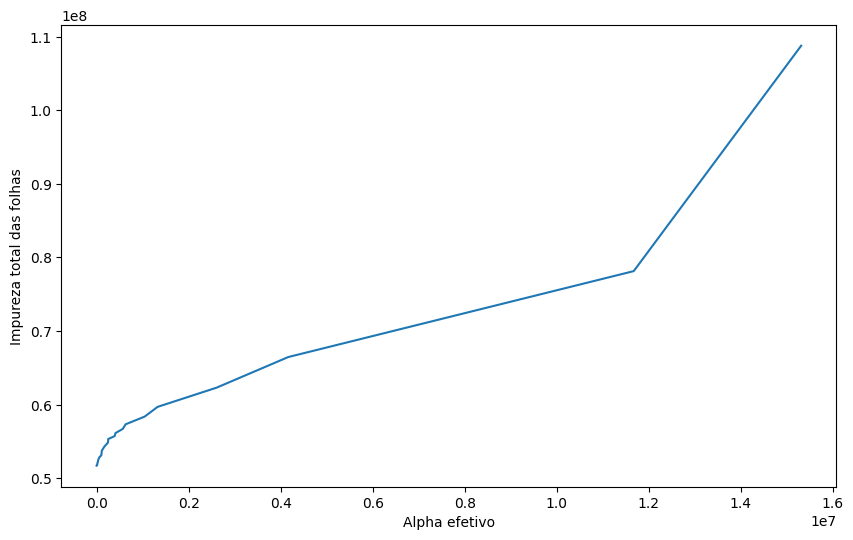

In [41]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

In [42]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_test, y_test)
    clfs.append(clf)

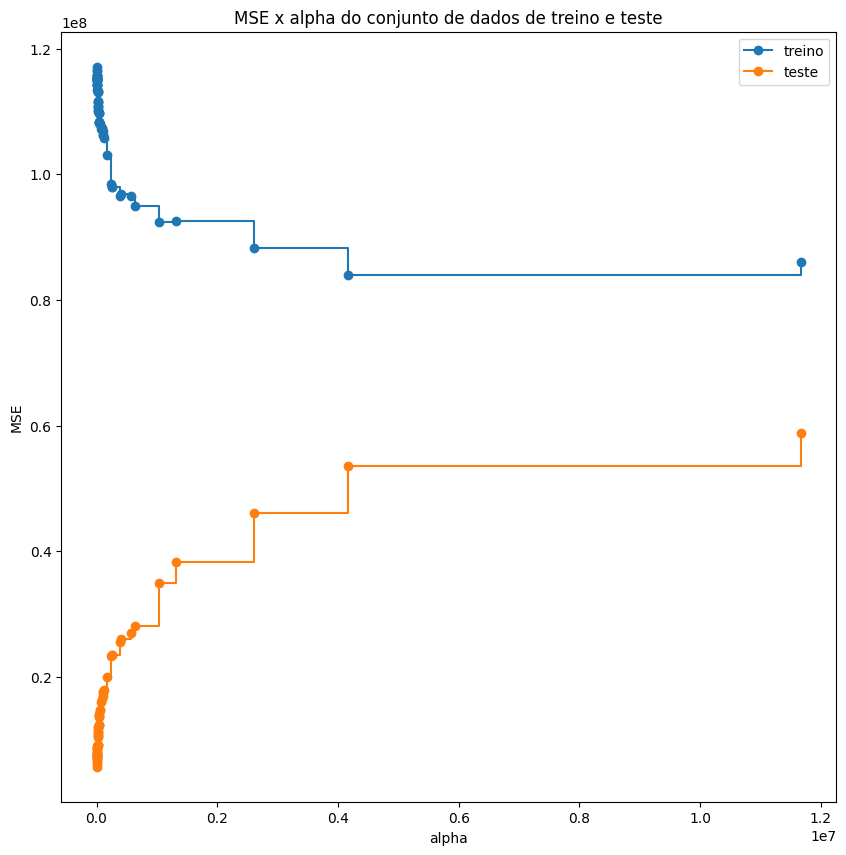

In [43]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test, clf.predict(X_test)) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

## Etapa 5 Crisp-DM: Avaliação dos resultados


In [44]:
print(f"R² de treino é: {reg_2.score(X_train, y_train)*100:.2f}%")
print(f"R² de teste é: {reg_2.score(X_test, y_test)*100:.2f}%")

R² de treino é: 50.83%
R² de teste é: 39.41%


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.